# Bakalarsky Projekt 1 - Experiment
### Vysvetlovanie rozhodnutie/rozdiely modelov v iris datasete

-----

## Analyza + Predspracovanie datasetu

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [6]:
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'

In [7]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/Users/edvin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/edvin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/edvin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


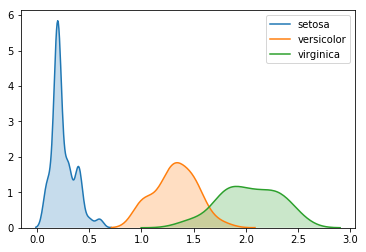

In [8]:
sns.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'], shade=True, label='setosa')
sns.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'petal_width_cm'], shade=True, label='versicolor')
sns.kdeplot(iris_data.loc[iris_data['class'] == 'Iris-virginica', 'petal_width_cm'], shade=True, label='virginica')

In [9]:
iris_data[iris_data.isnull().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [10]:
setosa_petal_width_mean = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
setosa_petal_width_mean

0.25111111111111106

In [11]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') & iris_data['petal_width_cm'].isnull(), 'petal_width_cm'] = setosa_petal_width_mean

### Zobrazenie box plotu pre atributy pre zistenie outlinerov

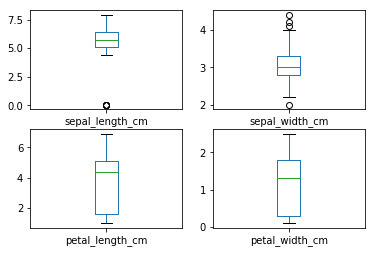

In [12]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

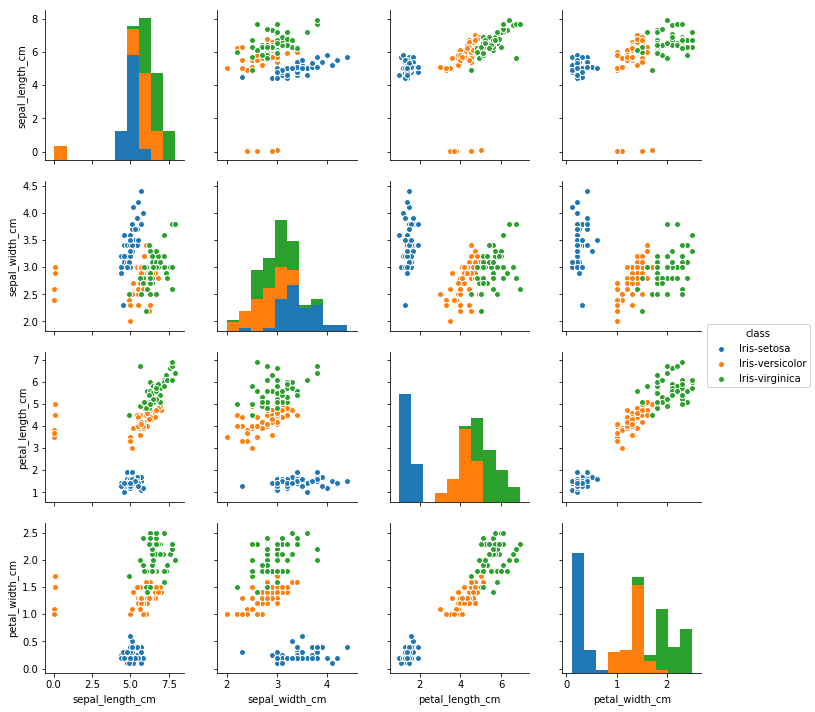

In [13]:
sns.pairplot(iris_data, hue="class")

### Zobrazenie korelacie medzi atributmy

In [14]:
iris_data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.478409
sepal_width_cm,0.066091,1.000000,-0.419796,-0.359236
petal_length_cm,0.489083,-0.419796,1.000000,0.961173
petal_width_cm,0.478409,-0.359236,0.961173,1.000000


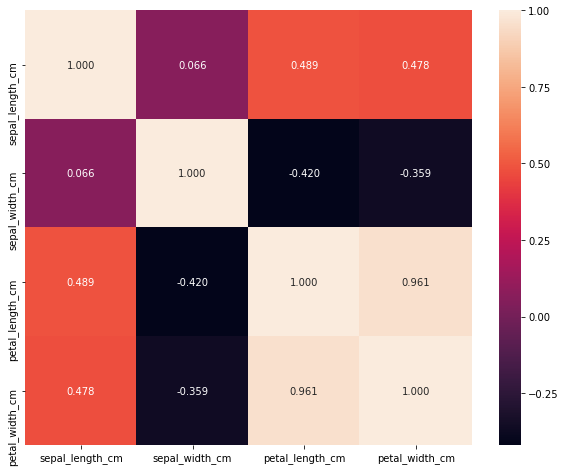

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris_data.corr(), ax=ax, annot=True, fmt=".3f")

----

## Rozdelenie datasetu na trenovaciu a testovaciu sadu

In [16]:
from sklearn import model_selection

In [17]:
array = iris_data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_validation = le.fit_transform(Y_validation)

----

## Vytvorenie modelov
- Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=7)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.941667 (0.053359)
LDA: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.966667 (0.055277)
SVM: 0.991667 (0.025000)


----

## Predikcia

In [21]:
# Make predictions on validation dataset
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)

predictions = svc.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.91      0.83      0.87        12
          2       0.83      0.91      0.87        11

avg / total       0.90      0.90      0.90        30



Zobrazenie klasifikacie SVM-ka v 2D priestore pouzijuc PCA kniznicu

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
pca.fit(X_validation)

X_p_train = pca.transform(X_validation)

In [24]:
svc.fit(X_p_train, predictions)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

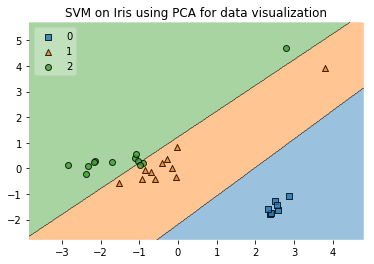

In [25]:
plot_decision_regions(X_p_train, predictions, clf=svc, legend=2)

# Adding axes annotations
plt.title('SVM on Iris using PCA for data visualization')
plt.show()

----

## Vysvetlenie predikcie

In [26]:
import graphviz
from sklearn import tree

In [27]:
data_feature_names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_validation, predictions)

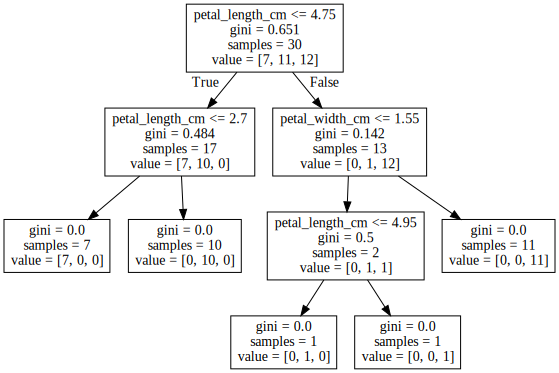

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=data_feature_names)
graph = graphviz.Source(dot_data) 
graph

Ideme vyplotovat najvyznamnejsie atributy, kedze linearny kernel v SVM-ku nam vie dat suradnice odelovacich vektorov

## Zobrazenie dolezitosti atributov podla triedy do ktorej boli zaradene (*iba v pripade linearneho kernelu*)

In [101]:
svc.fit(X_validation, predictions)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
data_feature_names

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

In [103]:
weights = svc.coef_
weights

array([[ 0.00780783,  0.17807215, -0.70369749, -0.27907224],
       [-0.01450476,  0.03644784, -0.50269884, -0.23804144],
       [ 0.13665622,  0.45640696, -1.7705087 , -1.21410174]])

In [104]:
labels = le.inverse_transform(svc.classes_)
labels

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

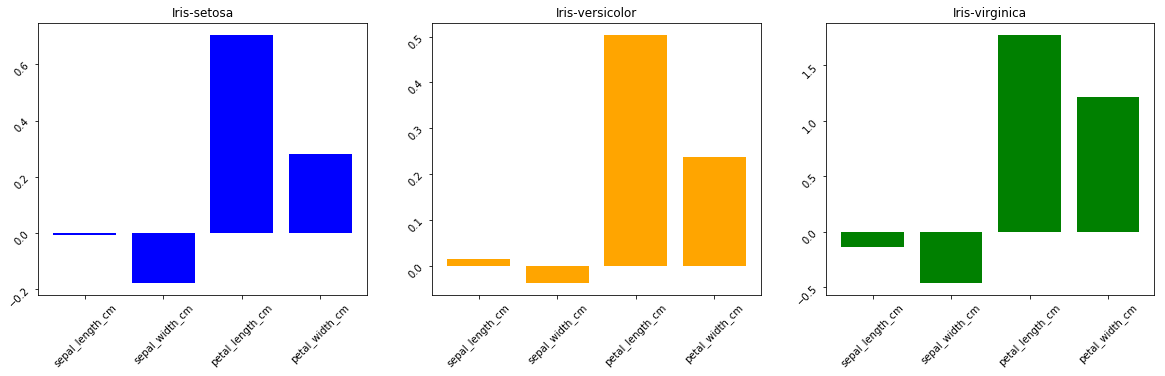

In [106]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

colors = ['b', 'orange', 'g']
for (weight, ax, label, color) in zip(weights, axs, labels, colors):
    ax.bar(data_feature_names, weight * (-1), color=color)
    ax.tick_params(labelrotation=45)
    ax.set_title(label)
    
plt.show()

##### Cim vacsi weight, tym mal atribut vacsi impakt v rozhodnuti pre zoradovania pozorovania do danej triedy

Zobrazenie globalneho plotu pre dolezitost atributov pre SVM

----

## Klasifikacia zobrazenie dolezitosti atributov pomcou algoritmu Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

/Users/edvin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [107]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(X_validation, predictions)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [110]:
importances = rnd_clf.feature_importances_
importances

array([0.10010863, 0.06640868, 0.48385498, 0.34962771])

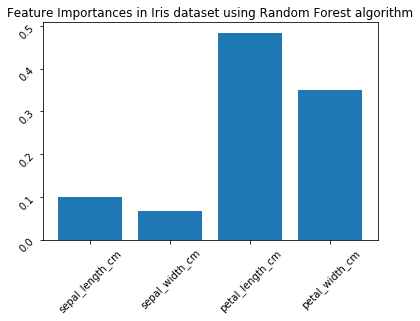

In [113]:
plt.bar(data_feature_names, importances)
plt.tick_params(labelrotation=45)
plt.title("Feature Importances in Iris dataset using Random Forest algorithm")
plt.show()